<a href="https://www.kaggle.com/thirumani/predicting-bigg-boss-tamil-ultimate-season-winner?scriptVersionId=86698494" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Predicting Tamil Bigg Boss (பிக் பாஸ் தமிழ்) Ultimate Season Winner

## Dataset https://www.kaggle.com/thirumani/bigg-boss-india-hindi-telugu-tamil-kannada

In [1]:
import datetime
print("Notebook was last executed on:", datetime.date.today().strftime("%Y-%b-%d"))

Notebook was last executed on: 2022-Feb-01


### Importing Required Python Libraries

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
import seaborn as sns
from babel.numbers import format_currency
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix

### Check and import dataset

In [3]:
! ls -l /kaggle/input/bigg-boss-india-hindi-telugu-tamil-kannada/Bigg_Boss_India.csv
bigg_boss = pd.read_csv('/kaggle/input/bigg-boss-india-hindi-telugu-tamil-kannada/Bigg_Boss_India.csv', encoding = "ISO-8859-1")

nRow, nCol = bigg_boss.shape
print(f'\nThere are {nRow} rows and {nCol} columns in the dataset')

-rw-r--r-- 1 nobody nogroup 99627 Feb  1 08:10 /kaggle/input/bigg-boss-india-hindi-telugu-tamil-kannada/Bigg_Boss_India.csv

There are 787 rows and 24 columns in the dataset


## Exploratory Data Analysis (EDA)

In [4]:
bigg_boss.head(5)

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Guest Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Finalist,Winner
0,Hindi,1,Amit Sadh,Soap Actor,Male,03-Nov-06,NaN,10.0,No,86,15,03-Nov-06,26-Jan-07,Arshad Warsi,NaN,0,Sony TV,2.72,3.0,0.0,0.0,NaN,0.0,0.0
1,Hindi,1,Anupama Verma,Model,Female,03-Nov-06,NaN,5.0,No,86,15,03-Nov-06,26-Jan-07,Arshad Warsi,NaN,0,Sony TV,2.72,1.0,0.0,0.0,NaN,0.0,0.0
2,Hindi,1,Aryan Vaid,Pageant Winner,Male,03-Nov-06,NaN,4.0,No,86,15,03-Nov-06,26-Jan-07,Arshad Warsi,NaN,0,Sony TV,2.72,1.0,0.0,0.0,NaN,0.0,0.0
3,Hindi,1,Bobby Darling,LGBT,Transgender,03-Nov-06,NaN,1.0,No,86,15,03-Nov-06,26-Jan-07,Arshad Warsi,NaN,0,Sony TV,2.72,1.0,0.0,0.0,NaN,0.0,0.0
4,Hindi,1,Carol Gracias,Model,Female,03-Nov-06,26-Jan-07,12.0,No,86,15,03-Nov-06,26-Jan-07,Arshad Warsi,NaN,0,Sony TV,2.72,6.0,0.0,0.0,NaN,1.0,0.0


In [5]:
bigg_boss.tail(10).T

,777,778,779,780,781,782,783,784,785,786
Language,Malayalam,Malayalam,Malayalam,Malayalam,Malayalam,Malayalam,Malayalam,Malayalam,Malayalam,Malayalam
Season Number,3,3,3,3,3,3,3,3,3,3
Name,Noby Marcose,Ramzan Muhammed,Rithu Manthra,Sai Vishnu,Sandhya Manoj,Soorya Menon,Firoz Khan & Sajna Firoz,Michelle Ann Daniel,Angel Thomas,Remya Panickar
Profession,Actor,Dancer,Singer,Commoner,Dancer,Model,Actor & Actress,Actress,Model,Actress
Gender,Male,Male,Female,Male,Female,Female,Couple,Female,Female,Female
Entry Date,14-Feb-21,14-Feb-21,14-Feb-21,14-Feb-21,14-Feb-21,14-Feb-21,NaN,NaN,NaN,NaN
Elimination Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Elimination Week Number,NaN,NaN,NaN,NaN,10,13,9,3,4,13
Wild Card,No,No,No,No,No,No,Yes,Yes,Yes,Yes
Season Length,95,95,95,95,95,95,95,95,95,95


In [6]:
bigg_boss.sample(10)

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Guest Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Finalist,Winner
223,Hindi,12,Rohit Suchanti,Soap Actor,Male,NaN,NaN,13.0,Yes,105,20,16-Sep-18,30-Dec-18,Salman Khan,NaN,0,Colors,4.99,5.0,0.0,0.0,NaN,0.0,0.0
355,Kannada,4,Dodda Ganesh,Sports Person,Male,09-Oct-16,NaN,NaN,No,112,18,09-Oct-16,29-Jan-17,Sudeep,NaN,0,Colors Kannada,NaN,NaN,0.0,NaN,NaN,0.0,0.0
783,Malayalam,3,Firoz Khan & Sajna Firoz,Actor & Actress,Couple,NaN,NaN,9.0,Yes,95,18,14-Feb-21,20-May-21,Mohanlal,NaN,0,Asianet,12.40,7.0,0.0,0.0,NaN,0.0,0.0
171,Hindi,10,Karan Mehra,Soap Actor,Male,16-Oct-16,NaN,5.0,No,105,18,16-Oct-16,28-Jan-17,Salman Khan,NaN,0,Colors,3.54,1.0,0.0,0.0,NaN,0.0,0.0
478,Telugu,2,Samrat Reddy,Actor,Male,10-Jun-18,30-Sep-18,16.0,No,112,18,10-Jun-18,30-Sep-18,Nani,NaN,0,Star Maa,15.00,3.0,0.0,1.0,5.0,1.0,0.0
272,Hindi,OTT,Muskan Jattana,Activist,Female,08-Aug-21,NaN,5.0,No,42,13,08-Aug-21,18-Sep-21,Karan Johar,NaN,0,Voot,NaN,3.0,0.0,NaN,NaN,0.0,0.0
495,Telugu,3,Rohini,Soap Actress,Female,21-Jul-19,18-Aug-19,4.0,No,105,17,21-Jul-19,03-Nov-19,Nagarjuna,Ramya Krishnan,0,Star Maa,18.10,1.0,0.0,0.0,NaN,0.0,0.0
356,Kannada,4,Karunya Ram,Actress,Female,09-Oct-16,NaN,NaN,No,112,18,09-Oct-16,29-Jan-17,Sudeep,NaN,0,Colors Kannada,NaN,NaN,0.0,NaN,NaN,0.0,0.0
517,Telugu,4,Syed Sohel Ryan,Soap Actor,Male,06-Sep-20,20-Dec-20,15.0,No,105,19,06-Sep-20,20-Dec-20,Nagarjuna,Samantha Akkineni,"25,00,000",Star Maa,20.10,7.0,0.0,1.0,7.0,1.0,0.0
753,Malayalam,2,Raghu Subhash,Radio Jockey,Male,05-Jan-20,NaN,NaN,No,75,23,05-Jan-20,20-Mar-20,Mohanlal,NaN,0,Asianet,11.03,3.0,1.0,0.0,NaN,0.0,0.0


In [7]:
bigg_boss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787 entries, 0 to 786
Data columns (total 24 columns):
Language                              787 non-null object
Season Number                         787 non-null object
Name                                  787 non-null object
Profession                            787 non-null object
Gender                                787 non-null object
Entry Date                            669 non-null object
Elimination Date                      152 non-null object
Elimination Week Number               654 non-null float64
Wild Card                             787 non-null object
Season Length                         787 non-null int64
Number of Housemates                  787 non-null int64
Season Start Date                     787 non-null object
Season End Date                       787 non-null object
Host Name                             787 non-null object
Guest Host Name                       110 non-null object
Prize Money (INR)         

In [8]:
bigg_boss.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Elimination Week Number,654.0,9.14,4.88,1.00,5.00,9.00,14.0,20.0
Season Length,787.0,100.72,17.99,28.00,98.00,105.00,105.0,143.0
Number of Housemates,787.0,18.28,2.55,10.00,17.00,18.00,20.0,24.0
Average TRP,531.0,8.71,5.55,2.72,3.81,7.64,12.4,20.1
Number of Evictions Faced,755.0,4.20,2.98,0.00,2.00,4.00,6.0,17.0
Number of re-entries,773.0,0.09,0.30,0.00,0.00,0.00,0.0,3.0
Number of times elected as Captain,734.0,0.54,0.74,0.00,0.00,0.00,1.0,5.0
Social Media Popularity,114.0,6.99,1.66,2.00,6.00,7.00,8.0,10.0
Finalist,773.0,0.25,0.44,0.00,0.00,0.00,1.0,1.0
Winner,773.0,0.05,0.23,0.00,0.00,0.00,0.0,1.0


In [9]:
bigg_boss['Season Start Date'] = pd.to_datetime(bigg_boss['Season Start Date'])
bigg_boss['Season End Date'] = pd.to_datetime(bigg_boss['Season End Date'])
bigg_boss['Entry Date'] = pd.to_datetime(bigg_boss['Entry Date'])
bigg_boss['Elimination Date'] = pd.to_datetime(bigg_boss['Elimination Date'])

In [10]:
bigg_boss['Finalist'] = bigg_boss['Finalist'].astype(pd.Int32Dtype())
bigg_boss['Elimination Week Number'] = bigg_boss['Elimination Week Number'].astype(pd.Int32Dtype())
bigg_boss['Number of Evictions Faced'] = bigg_boss['Number of Evictions Faced'].astype(pd.Int32Dtype())
bigg_boss['Number of re-entries'] = bigg_boss['Number of re-entries'].astype(pd.Int32Dtype())
bigg_boss['Number of times elected as Captain'] = bigg_boss['Number of times elected as Captain'].astype(pd.Int32Dtype())
bigg_boss['Social Media Popularity'] = bigg_boss['Social Media Popularity'].astype(pd.Int32Dtype())

bigg_boss['Prize Money (INR)'] = bigg_boss['Prize Money (INR)'].str.replace(',','')
bigg_boss['Prize Money (INR)'] = pd.to_numeric(bigg_boss['Prize Money (INR)'])

bigg_boss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787 entries, 0 to 786
Data columns (total 24 columns):
Language                              787 non-null object
Season Number                         787 non-null object
Name                                  787 non-null object
Profession                            787 non-null object
Gender                                787 non-null object
Entry Date                            669 non-null datetime64[ns]
Elimination Date                      152 non-null datetime64[ns]
Elimination Week Number               654 non-null Int32
Wild Card                             787 non-null object
Season Length                         787 non-null int64
Number of Housemates                  787 non-null int64
Season Start Date                     787 non-null datetime64[ns]
Season End Date                       787 non-null datetime64[ns]
Host Name                             787 non-null object
Guest Host Name                       110 non-null obj

In [11]:
# Unique values in each column
for col in bigg_boss.columns:
    print("Number of unique values in", col, "-", bigg_boss[col].nunique())

Number of unique values in Language - 7
Number of unique values in Season Number - 18
Number of unique values in Name - 752
Number of unique values in Profession - 79
Number of unique values in Gender - 4
Number of unique values in Entry Date - 53
Number of unique values in Elimination Date - 90
Number of unique values in Elimination Week Number - 20
Number of unique values in Wild Card - 2
Number of unique values in Season Length - 20
Number of unique values in Number of Housemates - 12
Number of unique values in Season Start Date - 44
Number of unique values in Season End Date - 42
Number of unique values in Host Name - 14
Number of unique values in Guest Host Name - 5
Number of unique values in Prize Money (INR) - 13
Number of unique values in Broadcasted By - 13
Number of unique values in Average TRP - 28
Number of unique values in Number of Evictions Faced - 17
Number of unique values in Number of re-entries - 4
Number of unique values in Number of times elected as Captain - 6
Num

In [12]:
# Number of seasons in all Indian languages
print("Total", bigg_boss.groupby('Language')['Season Number'].nunique().sum(), "seasons broadcasted (in TV & OTT)")
print(bigg_boss['Winner'].sum().astype(int)+1, "seasons completed")
print(bigg_boss.loc[bigg_boss['Winner'].isnull(), :].groupby('Language')['Season Number'].nunique().sum(), "season(s) running")

Total 44 seasons broadcasted (in TV & OTT)
43 seasons completed
1 season(s) running


## Bigg Boss Hindi has many seasons compared to other Indian languages. So, the number of housemates are more in Hindi.

In [13]:
# Number of seasons in each Indian language
print(bigg_boss.groupby('Language')['Season Number'].nunique().nlargest(10))

Language
Hindi        17
Kannada       8
Tamil         6
Telugu        5
Malayalam     3
Marathi       3
Bengali       2
Name: Season Number, dtype: int64


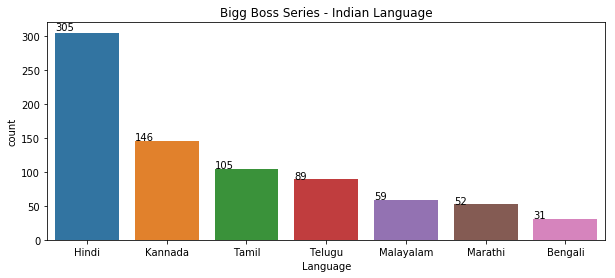

In [14]:
# Total number of Bigg Boss housemates
fig = plt.figure(figsize=(10,4))
ax = sns.countplot(x='Language', data=bigg_boss, order=bigg_boss['Language'].value_counts().index)
ax.set_title('Bigg Boss Series - Indian Language')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

## In Bigg Boss India seasons, most of the housemates entered in first day/week

No     658
Yes    129
Name: Wild Card, dtype: int64 

No     84%
Yes    16%
Name: Wild Card, dtype: object 



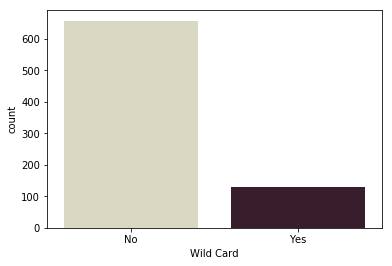

In [15]:
# Number of normal entries and wild card entries
print(bigg_boss['Wild Card'].value_counts(), "\n")
print(round(bigg_boss['Wild Card'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%'), "\n")
sns.countplot(x='Wild Card', data=bigg_boss, palette="ch:.45")

In [16]:
# Common people has many professions, so clubbing them into one category
bigg_boss['Profession'] = bigg_boss['Profession'].fillna('UNKNOWN')
bigg_boss.loc[bigg_boss['Profession'].str.contains('Commoner'),'Profession'] = 'Commoner'

## Number of film actresses entered into the Bigg Boss houses, are more when compared to other professions

Actress                  170
Actor                    130
Soap Actress              65
Model                     60
Singer                    52
Commoner                  40
Soap Actor                38
TV Anchor                 23
Reality Show Alumni       22
Comedian                  18
Social Media Star         18
Radio Jockey              16
News Presenter            14
Choreographer             13
Sports Person              9
Activist                   8
Film Director              8
International Star         6
Politician                 6
Video Jockey               6
Pageant Winner             6
Producer                   5
Controversial Fame         4
Dancer                     4
Swamiji                    4
LGBT                       4
Wrestler                   3
Businessman                3
Folk Artist                2
Fashion Designer           2
Lyricist                   2
Journalist                 2
Stage Actress              2
Musician                   2
Dubbing Artist

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]), <a list of 54 Text xticklabel objects>)

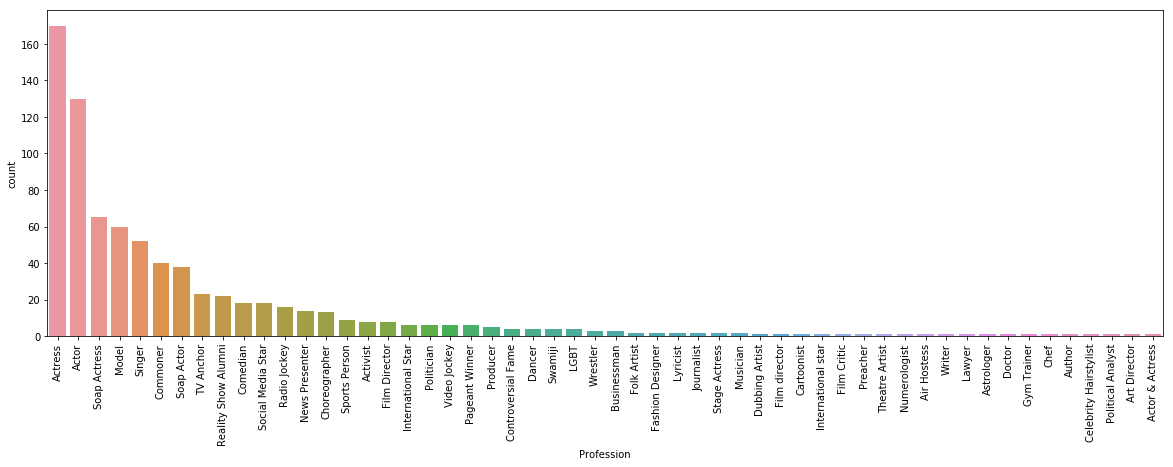

In [17]:
# Participant's Profession
print(bigg_boss['Profession'].value_counts())
fig = plt.figure(figsize=(20,6))
sns.countplot(x='Profession', data=bigg_boss, order=bigg_boss['Profession'].value_counts().index)
plt.xticks(rotation=90)

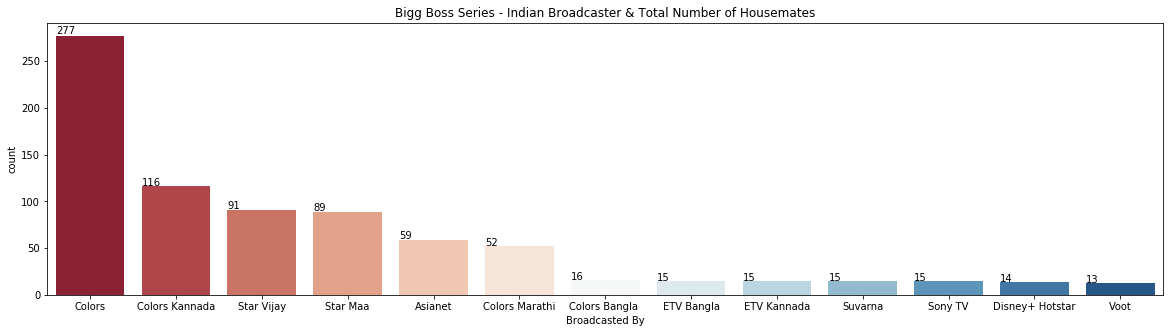

In [18]:
# Broadcaster
fig = plt.figure(figsize=(20,5))
ax = sns.countplot(x='Broadcasted By', data=bigg_boss, palette='RdBu', order=bigg_boss['Broadcasted By'].value_counts().index)
ax.set_title('Bigg Boss Series - Indian Broadcaster & Total Number of Housemates')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

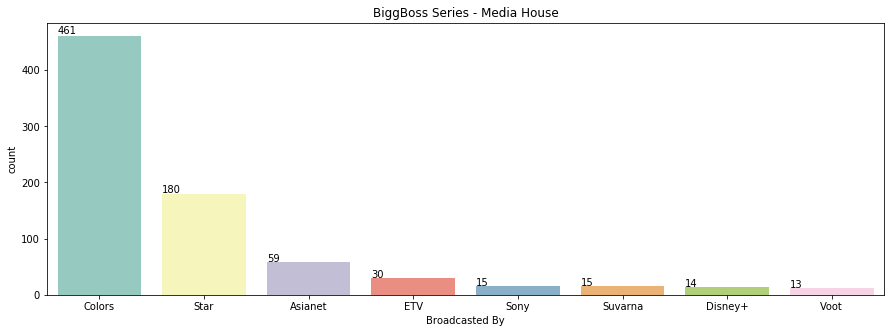

In [19]:
fig = plt.figure(figsize=(15,5))
ax = sns.countplot(bigg_boss['Broadcasted By'].str.split().str.get(0), data=bigg_boss, palette='Set3', order=bigg_boss['Broadcasted By'].str.split().str.get(0).value_counts().index)
ax.set_title('BiggBoss Series - Media House')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

## Salman Khan hosted most number of seasons (in Bigg Boss Hindi), Sudeep is next on the list

In [20]:
# Bigg Boss main hosts and number of seasons they hosted
bigg_boss.groupby('Host Name')['Season Number'].nunique().nlargest(25)

Host Name
Salman Khan            12
Sudeep                  8
Kamal Haasan            6
Mahesh Manjrekar        3
Mohanlal                3
Nagarjuna               3
Mithun Chakraborthy     2
Amitabh Bachchan        1
Arshad Warsi            1
Farah Khan              1
Jr. NTR                 1
Karan Johar             1
Nani                    1
Shilpa Shetty           1
Name: Season Number, dtype: int64

In [21]:
# Temporary or Guest host who hosted the week-end episodes
bigg_boss.groupby('Guest Host Name')['Season Number'].nunique().nlargest(10)

Guest Host Name
Ramya Krishnan       2
Farah Khan           1
Samantha Akkineni    1
Sanjay Dutt          1
Siddhartha Jadhav    1
Name: Season Number, dtype: int64

## In all Bigg Boss competitions, in languages and in all seasons, Female contestants are more

Female         410
Male           370
Transgender      6
Couple           1
Name: Gender, dtype: int64 

Female         52%
Male           47%
Transgender     1%
Couple          0%
Name: Gender, dtype: object


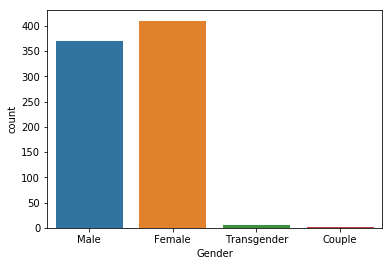

In [22]:
# Housemate's Gender
print(bigg_boss['Gender'].value_counts(), "\n")

# In percentage
print(round(bigg_boss['Gender'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%'))

sns.countplot(data = bigg_boss, x = 'Gender')

### Only 6 Transgenders (LGBT) participated in all Indian languages

In [23]:
# Maximum TRP of Bigg Boss India seasons (Big Brother in India)
print("Maximum TRP", bigg_boss['Average TRP'].max(), "\n")
print(bigg_boss.loc[bigg_boss['Average TRP']==bigg_boss['Average TRP'].max()][["Language","Season Number"]].head(1).to_string(index=False))

Maximum TRP 20.1 

Language Season Number
  Telugu             4


In [24]:
# Smallest season of Indian Bigg Boss seasons
print("Smallest season", bigg_boss['Season Length'].min(), "days \n")
print(bigg_boss.loc[bigg_boss['Season Length']==bigg_boss['Season Length'].min()][["Language","Season Number"]].head(1).to_string(index=False))

Smallest season 28 days 

Language Season Number
   Hindi     Halla Bol


In [25]:
# Longest season of Bigg Boss Indian seasons
print("Longest season", bigg_boss['Season Length'].max(), "days \n")
print(bigg_boss.loc[bigg_boss['Season Length']==bigg_boss['Season Length'].max()][["Language","Season Number"]].head(1).to_string(index=False))

Longest season 143 days 

Language Season Number
   Hindi            14


In [26]:
print("Maximum number of contestants in one season:", bigg_boss['Number of Housemates'].max(), "\n")
print(bigg_boss.loc[bigg_boss['Number of Housemates']==bigg_boss['Number of Housemates'].max()][["Language","Season Number"]].head(1).to_string(index=False))

Maximum number of contestants in one season: 24 

Language Season Number
   Hindi            15


In [27]:
print("Maximum number of evictions faced in one season:", bigg_boss['Number of Evictions Faced'].max(), "\n")
print("\nTop 3 contestants who faced maximum number of evictions\n")
print(bigg_boss.loc[bigg_boss['Number of Evictions Faced']>=bigg_boss['Number of Evictions Faced'].max()-3][["Language","Season Number","Name","Number of Evictions Faced"]].head(3).sort_values("Number of Evictions Faced",ascending=False).to_string(index=False))

Maximum number of evictions faced in one season: 17 


Top 3 contestants who faced maximum number of evictions

Language Season Number                Name  Number of Evictions Faced
   Hindi            14       Rubina Dilaik                         17
 Kannada             8  Prashanth Sambargi                         15
   Hindi            14        Rahul Vaidya                         14


In [28]:
bigg_boss['Season Length in weeks'] = round(bigg_boss['Season Length']/7,0).astype(pd.Int32Dtype())
bigg_boss['Evictions Faced Percentage'] = round(bigg_boss['Number of Evictions Faced']/bigg_boss['Season Length in weeks']*100,0).astype(pd.Int32Dtype())
print("Maximum percentage of evictions faced in one season:", bigg_boss['Evictions Faced Percentage'].max(), "%\n")
print("\nTop 4 contestants who faced maximum percentage of evictions (they were in nominations almost every week)\n")
print(bigg_boss.loc[bigg_boss['Evictions Faced Percentage']>=bigg_boss['Evictions Faced Percentage'].max()-15][["Language","Season Number","Name","Number of Evictions Faced","Season Length in weeks","Evictions Faced Percentage"]].head(5).sort_values("Evictions Faced Percentage",ascending=False).to_string(index=False))

Maximum percentage of evictions faced in one season: 100 %


Top 4 contestants who faced maximum percentage of evictions (they were in nominations almost every week)

  Language Season Number                Name  Number of Evictions Faced  Season Length in weeks  Evictions Faced Percentage
     Hindi     Halla Bol       Dimpy Ganguly                          4                       4                         100
   Kannada             8  Prashanth Sambargi                         15                      17                          88
 Malayalam             3          Sai Vishnu                         12                      14                          86
     Hindi            14       Rubina Dilaik                         17                      20                          85


In [29]:
print("Maximum number of re-entries:", bigg_boss['Number of re-entries'].max(), "\n")
print(bigg_boss.loc[bigg_boss['Number of re-entries']>=bigg_boss['Number of re-entries'].max()-1][["Language","Season Number","Name","Number of re-entries"]].head(5).sort_values("Number of re-entries",ascending=False).to_string(index=False))

Maximum number of re-entries: 3 

Language Season Number          Name  Number of re-entries
   Hindi            14   Vikas Gupta                     3
  Telugu             1  Mumaith Khan                     2
  Telugu             2   Nutan Naidu                     2


In [30]:
print("Maximum number of times elected as captain:", bigg_boss['Number of times elected as Captain'].max(), "\n")
print(bigg_boss.loc[bigg_boss['Number of times elected as Captain']>=bigg_boss['Number of times elected as Captain'].max()-1][["Language","Season Number","Name","Number of times elected as Captain"]].head(6).sort_values("Number of times elected as Captain",ascending=False).to_string(index=False))

Maximum number of times elected as captain: 5 

  Language Season Number            Name  Number of times elected as Captain
     Hindi            12     Surbhi Rana                                   5
     Hindi             9   Prince Narula                                   4
     Hindi            10  Manveer Gurjar                                   4
 Malayalam             2   Saju Navodaya                                   4


In [31]:
# Many contestants entered via wild card, but 21 people managed to go to Finale
print(bigg_boss.loc[(bigg_boss['Wild Card']=='Yes') & (bigg_boss['Finalist']==1), 'Finalist'].value_counts())
bigg_boss.loc[(bigg_boss['Wild Card']=='Yes') & (bigg_boss['Finalist']==1), :]

1    21
Name: Finalist, dtype: int64


,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Guest Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Finalist,Winner,Season Length in weeks,Evictions Faced Percentage
44,Hindi,3,Pravesh Rana,Model,Male,NaT,NaT,12,Yes,84,15,2009-10-04,2009-12-26,Amitabh Bachchan,NaN,0.0,Colors,2.83,4,0,0,NaN,1,0.0,12,33
59,Hindi,4,Dalip Singh Rana (Khali),Wrestler,Male,NaT,2011-01-08,14,Yes,96,16,2010-10-03,2011-01-08,Salman Khan,NaN,0.0,Colors,4.95,2,0,2,NaN,1,0.0,14,14
60,Hindi,4,Dolly Bindra,Actress,Female,NaT,2011-01-08,14,Yes,96,16,2010-10-03,2011-01-08,Salman Khan,NaN,0.0,Colors,4.95,4,0,1,NaN,1,0.0,14,29
75,Hindi,5,Amar Upadhyay,Actor,Male,NaT,2012-01-07,14,Yes,98,18,2011-10-02,2012-01-07,Salman Khan,Sanjay Dutt,0.0,Colors,4.19,7,0,1,NaN,1,0.0,14,50
76,Hindi,5,Siddharth Bhardwaj,Reality Show Alumni,Male,NaT,2012-01-07,14,Yes,98,18,2011-10-02,2012-01-07,Salman Khan,Sanjay Dutt,0.0,Colors,4.19,5,0,0,NaN,1,0.0,14,36
77,Hindi,5,Akashdeep Saigal,Actor,Male,NaT,2012-01-07,14,Yes,98,18,2011-10-02,2012-01-07,Salman Khan,Sanjay Dutt,0.0,Colors,4.19,5,0,1,NaN,1,0.0,14,36
96,Hindi,6,Imam Siddique,Reality Show Alumni,Male,NaT,2013-01-12,14,Yes,97,19,2012-10-07,2013-01-12,Salman Khan,NaN,0.0,Colors,3.81,6,1,1,NaN,1,0.0,14,43
115,Hindi,7,Ajaz Khan,Actor,Male,NaT,2013-12-28,15,Yes,105,20,2013-09-15,2013-12-28,Salman Khan,NaN,0.0,Colors,4.40,7,0,0,NaN,1,0.0,15,47
133,Hindi,8,Ali Quli Mirza,Singer,Male,NaT,2015-01-03,15,Yes,105,19,2014-09-21,2015-01-03,Salman Khan,Farah Khan,0.0,Colors,3.77,6,0,1,NaN,1,0.0,15,40
135,Hindi,8,Dimpy Ganguly,TV Anchor,Female,NaT,2015-01-03,15,Yes,105,19,2014-09-21,2015-01-03,Salman Khan,Farah Khan,0.0,Colors,3.77,5,0,1,NaN,1,0.0,15,33


## About Winners only

In [32]:
print("Total Bigg Boss season winners", bigg_boss['Winner'].sum().astype(int), "(out of", bigg_boss['Finalist'].sum(), "finalists)")
# For Malayalam Season 2 winner was not declared

Total Bigg Boss season winners 42 (out of 197 finalists)


In [33]:
# All BB Winners
bigg_boss.loc[bigg_boss.Winner==1]

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Guest Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Finalist,Winner,Season Length in weeks,Evictions Faced Percentage
8,Hindi,1,Rahul Roy,Actor,Male,2006-11-03,NaT,NaN,No,86,15,2006-11-03,2007-01-26,Arshad Warsi,NaN,10000000.0,Sony TV,2.72,4,0,0,NaN,1,1.0,12,33
16,Hindi,2,Ashutosh Kaushik,Reality Show Alumni,Male,2008-08-17,NaT,NaN,No,98,15,2008-08-17,2008-11-22,Shilpa Shetty,NaN,10000000.0,Colors,2.89,4,0,0,NaN,1,1.0,14,29
42,Hindi,3,Vindu Dara Singh,Actor,Male,2009-10-04,NaT,NaN,No,84,15,2009-10-04,2009-12-26,Amitabh Bachchan,NaN,10000000.0,Colors,2.83,7,0,0,NaN,1,1.0,12,58
57,Hindi,4,Shweta Tiwari,Soap Actress,Female,2010-10-03,NaT,NaN,No,96,16,2010-10-03,2011-01-08,Salman Khan,NaN,10000000.0,Colors,4.95,4,0,2,NaN,1,1.0,14,29
62,Hindi,5,Juhi Parmar,Soap Actress,Female,2011-10-02,NaT,NaN,No,98,18,2011-10-02,2012-01-07,Salman Khan,Sanjay Dutt,10000000.0,Colors,4.19,4,0,1,NaN,1,1.0,14,29
92,Hindi,6,Urvashi Dholakia,Soap Actress,Female,2012-10-07,NaT,NaN,No,97,19,2012-10-07,2013-01-12,Salman Khan,NaN,5000000.0,Colors,3.81,6,0,1,NaN,1,1.0,14,43
102,Hindi,7,Gauhar Khan,Actress,Female,2013-09-15,NaT,NaN,No,105,20,2013-09-15,2013-12-28,Salman Khan,NaN,5000000.0,Colors,4.40,7,0,2,NaN,1,1.0,15,47
121,Hindi,8,Gautam Gulati,Actor,Male,2014-09-21,NaT,NaN,No,105,19,2014-09-21,2015-01-03,Salman Khan,Farah Khan,5000000.0,Colors,3.77,10,0,1,NaN,1,1.0,15,67
140,Hindi,Halla Bol,Gautam Gulati,Actor,Male,2015-01-04,NaT,NaN,No,28,10,2015-01-04,2015-01-31,Farah Khan,NaN,5000000.0,Colors,2.82,2,0,0,NaN,1,1.0,4,50
154,Hindi,9,Prince Narula,Reality Show Alumni,Male,2015-10-11,NaT,NaN,No,105,20,2015-10-11,2016-01-23,Salman Khan,NaN,5000000.0,Colors,2.90,6,0,4,NaN,1,1.0,15,40


In [34]:
# Sum of prize money won by all BB Season winners/participants, in India
print(format_currency(bigg_boss['Prize Money (INR)'].sum(), 'INR', locale='en_IN').replace(".00", ""))

# 22 crores and 56 lakh rupees

₹ 22,56,00,000


In [35]:
# Profession of BB Season Winners
bigg_boss.loc[bigg_boss.Winner==1,'Profession'].value_counts()

Actor                  12
Soap Actress            6
Actress                 6
Singer                  4
Reality Show Alumni     3
Soap Actor              3
Commoner                2
TV Anchor               2
Film Director           1
Video Jockey            1
Model                   1
Comedian                1
Name: Profession, dtype: int64

In [36]:
# Gender of Season title Winners
print(bigg_boss.loc[bigg_boss.Winner==1, 'Gender'].value_counts(),'\n')

# In percentage
print(round(bigg_boss.loc[bigg_boss.Winner==1, 'Gender'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%'))

Male      30
Female    12
Name: Gender, dtype: int64 

Male      71%
Female    29%
Name: Gender, dtype: object


## No wild card entry housemate won the Bigg Boss competition.

In [37]:
# Entry type of the Season Winners
bigg_boss.loc[bigg_boss.Winner==1, 'Wild Card'].value_counts()

No    42
Name: Wild Card, dtype: int64

In [38]:
bigg_boss.loc[bigg_boss.Winner==1, 'Season Length'].value_counts().sort_index()

# Length of the season - Number of Winners

28      1
42      1
70      1
84      1
86      1
90      1
95      1
96      1
97      2
98     10
100     1
105    12
106     2
112     2
113     1
117     1
121     1
140     1
143     1
Name: Season Length, dtype: int64

In [39]:
bigg_boss.loc[bigg_boss.Winner==1, 'Number of Housemates'].value_counts().sort_index()

# Number of Housemates in house - Number of Winners

10    1
13    1
15    6
16    3
17    5
18    9
19    6
20    8
22    2
24    1
Name: Number of Housemates, dtype: int64

In [40]:
# Number of eliminations or evictions faced by the Bigg Boss competition winners
bigg_boss.loc[bigg_boss.Winner==1, 'Number of Evictions Faced'].value_counts().sort_index()

# Number of eliminations faced - Number of Winners

2     1
4     7
5     5
6     6
7     7
8     1
9     7
10    1
11    2
12    3
17    1
Name: Number of Evictions Faced, dtype: int64

In [41]:
# No re-entered contestant won Bigg Boss title
bigg_boss.loc[bigg_boss.Winner==1, 'Number of re-entries'].value_counts()

0    42
Name: Number of re-entries, dtype: int64

In [42]:
# Bigg Boss title winners number of times elected as captain
bigg_boss.loc[bigg_boss.Winner==1, 'Number of times elected as Captain'].value_counts().sort_index()

# Number of times elected as Captain - Number of winners

0    13
1    12
2    12
3     1
4     2
Name: Number of times elected as Captain, dtype: int64

## BB Tamil Seasons

In [43]:
lang='Tamil'

# All Bigg Boss Tamil Participants
bigg_boss.loc[(bigg_boss['Language']==lang)]

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Guest Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Finalist,Winner,Season Length in weeks,Evictions Faced Percentage
540,Tamil,1,Aarav Nafeez,Model,Male,2017-06-25,NaT,NaN,No,98,19,2017-06-25,2017-09-30,Kamal Haasan,NaN,5000000.0,Star Vijay,7.8,7,0,1,7,1,1.0,14,50
541,Tamil,1,Anuya Bhagvath,Actress,Female,2017-06-25,NaT,1,No,98,19,2017-06-25,2017-09-30,Kamal Haasan,NaN,0.0,Star Vijay,7.8,1,0,0,NaN,0,0.0,14,7
542,Tamil,1,Bharani,Actor,Male,2017-06-25,NaT,2,No,98,19,2017-06-25,2017-09-30,Kamal Haasan,NaN,0.0,Star Vijay,7.8,1,0,0,NaN,0,0.0,14,7
543,Tamil,1,Ganesh Venkatraman,Actor,Male,2017-06-25,2017-09-30,14,No,98,19,2017-06-25,2017-09-30,Kamal Haasan,NaN,0.0,Star Vijay,7.8,6,0,1,5,1,0.0,14,43
544,Tamil,1,Ganja Karuppu,Comedian,Male,2017-06-25,NaT,2,No,98,19,2017-06-25,2017-09-30,Kamal Haasan,NaN,0.0,Star Vijay,7.8,1,0,0,NaN,0,0.0,14,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,Tamil,Ultimate,Suresh Chakravarthi,Actor,Male,2022-01-30,NaT,NaN,No,70,14,2022-01-30,2022-04-17,Kamal Haasan,NaN,NaN,Disney+ Hotstar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN
641,Tamil,Ultimate,Suruthi Periyasamy,Model,Female,2022-01-30,NaT,NaN,No,70,14,2022-01-30,2022-04-17,Kamal Haasan,NaN,NaN,Disney+ Hotstar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN
642,Tamil,Ultimate,Thadi Bhalajie,Actor,Male,2022-01-30,NaT,NaN,No,70,14,2022-01-30,2022-04-17,Kamal Haasan,NaN,NaN,Disney+ Hotstar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN
643,Tamil,Ultimate,Thamarai Selvi,Folk Artist,Female,2022-01-30,NaT,NaN,No,70,14,2022-01-30,2022-04-17,Kamal Haasan,NaN,NaN,Disney+ Hotstar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN


In [44]:
# Bigg Boss Tamil Winners
bigg_boss.loc[(bigg_boss['Language']==lang) & (bigg_boss['Winner']==1), :]

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Guest Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Finalist,Winner,Season Length in weeks,Evictions Faced Percentage
540,Tamil,1,Aarav Nafeez,Model,Male,2017-06-25,NaT,NaN,No,98,19,2017-06-25,2017-09-30,Kamal Haasan,NaN,5000000.0,Star Vijay,7.8,7,0,1,7,1,1.0,14,50
569,Tamil,2,Riythvika,Actress,Female,2018-06-17,NaT,NaN,No,105,17,2018-06-17,2018-09-30,Kamal Haasan,NaN,5000000.0,Star Vijay,8.2,6,0,1,8,1,1.0,15,40
583,Tamil,3,Mugen Rao,Singer,Male,2019-06-23,NaT,NaN,No,105,17,2019-06-23,2019-10-06,Kamal Haasan,NaN,5000000.0,Star Vijay,8.8,4,0,2,8,1,1.0,15,27
594,Tamil,4,Aari Arjunan,Actor,Male,2020-10-04,NaT,NaN,No,105,18,2020-10-04,2021-01-17,Kamal Haasan,NaN,5000000.0,Star Vijay,15.6,11,0,2,9,1,1.0,15,73
625,Tamil,5,Raju Jeyamohan,Actor,Male,2021-10-03,NaT,NaN,No,105,20,2021-10-03,2022-01-16,Kamal Haasan,Ramya Krishnan,3800000.0,Star Vijay,18.6,7,0,0,10,1,1.0,15,47


In [45]:
# Tamil Bigg Boss all seasons finalists
bigg_boss.loc[(bigg_boss['Language']==lang) & (bigg_boss['Finalist']==1), :]

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Guest Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Finalist,Winner,Season Length in weeks,Evictions Faced Percentage
540,Tamil,1,Aarav Nafeez,Model,Male,2017-06-25,NaT,NaN,No,98,19,2017-06-25,2017-09-30,Kamal Haasan,NaN,5000000.0,Star Vijay,7.8,7,0,1,7,1,1.0,14,50
543,Tamil,1,Ganesh Venkatraman,Actor,Male,2017-06-25,2017-09-30,14,No,98,19,2017-06-25,2017-09-30,Kamal Haasan,NaN,0.0,Star Vijay,7.8,6,0,1,5,1,0.0,14,43
552,Tamil,1,Snehan,Lyricist,Male,2017-06-25,2017-09-30,14,No,98,19,2017-06-25,2017-09-30,Kamal Haasan,NaN,0.0,Star Vijay,7.8,6,0,3,6,1,0.0,14,43
557,Tamil,1,Harish Kalyan,Actor,Male,NaT,2017-09-30,14,Yes,98,19,2017-06-25,2017-09-30,Kamal Haasan,NaN,0.0,Star Vijay,7.8,4,0,1,5,1,0.0,14,29
559,Tamil,2,Aishwarya Dutta,Actress,Female,2018-06-17,2018-09-30,15,No,105,17,2018-06-17,2018-09-30,Kamal Haasan,NaN,0.0,Star Vijay,8.2,5,0,2,7,1,0.0,15,33
562,Tamil,2,Janani Iyer,Actress,Female,2018-06-17,2018-09-30,15,No,105,17,2018-06-17,2018-09-30,Kamal Haasan,NaN,0.0,Star Vijay,8.2,6,0,1,5,1,0.0,15,40
569,Tamil,2,Riythvika,Actress,Female,2018-06-17,NaT,NaN,No,105,17,2018-06-17,2018-09-30,Kamal Haasan,NaN,5000000.0,Star Vijay,8.2,6,0,1,8,1,1.0,15,40
575,Tamil,2,Vijayalakshmi,Actress,Female,NaT,2018-09-30,15,Yes,105,17,2018-06-17,2018-09-30,Kamal Haasan,NaN,0.0,Star Vijay,8.2,4,0,0,6,1,0.0,15,27
581,Tamil,3,Losliya Mariyanesan,News Presenter,Female,2019-06-23,NaT,15,No,105,17,2019-06-23,2019-10-06,Kamal Haasan,NaN,0.0,Star Vijay,8.8,6,0,1,6,1,0.0,15,40
583,Tamil,3,Mugen Rao,Singer,Male,2019-06-23,NaT,NaN,No,105,17,2019-06-23,2019-10-06,Kamal Haasan,NaN,5000000.0,Star Vijay,8.8,4,0,2,8,1,1.0,15,27


In [46]:
# Number of finalists gender wise, in each BB Tamil season
bigg_boss[(bigg_boss['Language']==lang) & (bigg_boss['Finalist']==1)].groupby('Gender')['Season Number'].value_counts().sort_index()

# First season all Male finalists, second season all Female finalists
# Third season 50% Male & 50% Female finalists

Gender  Season Number
Female  2                4
        3                2
        4                1
        5                2
Male    1                4
        3                2
        4                4
        5                3
Name: Season Number, dtype: int64

In [47]:
# Bigg Boss Tamil current season participants
bigg_boss.loc[(bigg_boss['Language']==lang) & (bigg_boss['Season Number']=='Ultimate'), :]

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Guest Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Finalist,Winner,Season Length in weeks,Evictions Faced Percentage
631,Tamil,Ultimate,Abhinay Vaddi,Actor,Male,2022-01-30,NaT,NaN,No,70,14,2022-01-30,2022-04-17,Kamal Haasan,NaN,NaN,Disney+ Hotstar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN
632,Tamil,Ultimate,Abhirami Venkatachalam,Model,Female,2022-01-30,NaT,NaN,No,70,14,2022-01-30,2022-04-17,Kamal Haasan,NaN,NaN,Disney+ Hotstar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN
633,Tamil,Ultimate,Anitha Sampath,News Presenter,Female,2022-01-30,NaT,NaN,No,70,14,2022-01-30,2022-04-17,Kamal Haasan,NaN,NaN,Disney+ Hotstar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN
634,Tamil,Ultimate,Balaji Murugadoss,Model,Male,2022-01-30,NaT,NaN,No,70,14,2022-01-30,2022-04-17,Kamal Haasan,NaN,NaN,Disney+ Hotstar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN
635,Tamil,Ultimate,Maria Juliana,Actress,Female,2022-01-30,NaT,NaN,No,70,14,2022-01-30,2022-04-17,Kamal Haasan,NaN,NaN,Disney+ Hotstar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN
636,Tamil,Ultimate,Niroop Nandhakumar,Actor,Male,2022-01-30,NaT,NaN,No,70,14,2022-01-30,2022-04-17,Kamal Haasan,NaN,NaN,Disney+ Hotstar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN
637,Tamil,Ultimate,Shariq Hassan Khan,Actor,Male,2022-01-30,NaT,NaN,No,70,14,2022-01-30,2022-04-17,Kamal Haasan,NaN,NaN,Disney+ Hotstar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN
638,Tamil,Ultimate,Snehan,Lyricist,Male,2022-01-30,NaT,NaN,No,70,14,2022-01-30,2022-04-17,Kamal Haasan,NaN,NaN,Disney+ Hotstar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN
639,Tamil,Ultimate,Suja Varunee,Actress,Female,2022-01-30,NaT,NaN,No,70,14,2022-01-30,2022-04-17,Kamal Haasan,NaN,NaN,Disney+ Hotstar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN
640,Tamil,Ultimate,Suresh Chakravarthi,Actor,Male,2022-01-30,NaT,NaN,No,70,14,2022-01-30,2022-04-17,Kamal Haasan,NaN,NaN,Disney+ Hotstar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN


In [48]:
# Bigg Boss Tamil Housemate's Gender
print(bigg_boss.loc[(bigg_boss['Language']==lang), 'Gender'].value_counts(), "\n")

Female         57
Male           47
Transgender     1
Name: Gender, dtype: int64 



In [49]:
print("\nTop 5 Tamil contestants who faced maximum number of evictions\n")
tmax=bigg_boss.loc[(bigg_boss['Language']==lang),'Number of Evictions Faced'].max()
print(bigg_boss.loc[(bigg_boss['Language']==lang) & (bigg_boss['Number of Evictions Faced']>=tmax-2)][["Season Number","Name","Number of Evictions Faced"]].head(8).sort_values("Number of Evictions Faced",ascending=False).to_string(index=False))


Top 5 Tamil contestants who faced maximum number of evictions

Season Number                Name  Number of Evictions Faced
            5        Pavani Reddy                         12
            4        Aari Arjunan                         11
            5       Akshara Reddy                         10
            5  Priyanka Deshpande                         10


In [50]:
print("\nTop Tamil contestant(s) who faced maximum percentage of evictions (they were in nominations almost every week)\n")
tpmax=bigg_boss.loc[(bigg_boss['Language']==lang), 'Evictions Faced Percentage'].max()
print(bigg_boss.loc[(bigg_boss['Language']==lang) & (bigg_boss['Evictions Faced Percentage']>=tpmax-10)][["Season Number","Name","Number of Evictions Faced","Season Length in weeks","Evictions Faced Percentage"]].head(6).sort_values("Evictions Faced Percentage",ascending=False).to_string(index=False))


Top Tamil contestant(s) who faced maximum percentage of evictions (they were in nominations almost every week)

Season Number          Name  Number of Evictions Faced  Season Length in weeks  Evictions Faced Percentage
            5  Pavani Reddy                         12                      15                          80
            4  Aari Arjunan                         11                      15                          73


## Preparing Data for ML modelling

In [51]:
# Handling NULL values
bigg_boss.isnull().sum()

Language                                0
Season Number                           0
Name                                    0
Profession                              0
Gender                                  0
Entry Date                            118
Elimination Date                      635
Elimination Week Number               133
Wild Card                               0
Season Length                           0
Number of Housemates                    0
Season Start Date                       0
Season End Date                         0
Host Name                               0
Guest Host Name                       677
Prize Money (INR)                      14
Broadcasted By                          0
Average TRP                           256
Number of Evictions Faced              32
Number of re-entries                   14
Number of times elected as Captain     53
Social Media Popularity               673
Finalist                               14
Winner                            

In [52]:
# Removing records where Name field is empty
bigg_boss = bigg_boss.loc[bigg_boss.Name.notnull()]
bigg_boss.reset_index(drop=True,inplace=True)

In [53]:
# Contestant might have faced at least one eviction, so filling NaN with 'Number of Evictions Faced' with 1
bigg_boss['Number of Evictions Faced'] = bigg_boss['Number of Evictions Faced'].fillna(1)

# Number of re-entries are very less, so filling NULLs in 'Number of re-entries' with 0
bigg_boss['Number of re-entries'] = bigg_boss['Number of re-entries'].fillna(0)

# Filling blank values in 'Average TRP' column with average
bigg_boss['Average TRP'] = bigg_boss['Average TRP'].fillna(bigg_boss['Average TRP'].mean())

# Filling NULLs in 'Number of times elected as Captain' with 0
bigg_boss['Number of times elected as Captain'] = bigg_boss['Number of times elected as Captain'].fillna(0)

In [54]:
bigg_boss['Season Starting Year'] = bigg_boss['Season Start Date'].dt.year.astype(pd.Int32Dtype())
bigg_boss['Season Ending Year'] = bigg_boss['Season End Date'].dt.year.astype(pd.Int32Dtype())
bigg_boss['Season Starting Quarter'] = bigg_boss['Season Start Date'].dt.quarter.astype(pd.Int32Dtype())
bigg_boss['Season Ending Quarter'] = bigg_boss['Season End Date'].dt.quarter.astype(pd.Int32Dtype())
bigg_boss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787 entries, 0 to 786
Data columns (total 30 columns):
Language                              787 non-null object
Season Number                         787 non-null object
Name                                  787 non-null object
Profession                            787 non-null object
Gender                                787 non-null object
Entry Date                            669 non-null datetime64[ns]
Elimination Date                      152 non-null datetime64[ns]
Elimination Week Number               654 non-null Int32
Wild Card                             787 non-null object
Season Length                         787 non-null int64
Number of Housemates                  787 non-null int64
Season Start Date                     787 non-null datetime64[ns]
Season End Date                       787 non-null datetime64[ns]
Host Name                             787 non-null object
Guest Host Name                       110 non-null obj

In [55]:
bigg_boss.head()

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Guest Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Finalist,Winner,Season Length in weeks,Evictions Faced Percentage,Season Starting Year,Season Ending Year,Season Starting Quarter,Season Ending Quarter
0,Hindi,1,Amit Sadh,Soap Actor,Male,2006-11-03,NaT,10,No,86,15,2006-11-03,2007-01-26,Arshad Warsi,NaN,0.0,Sony TV,2.72,3,0,0,NaN,0,0.0,12,25,2006,2007,4,1
1,Hindi,1,Anupama Verma,Model,Female,2006-11-03,NaT,5,No,86,15,2006-11-03,2007-01-26,Arshad Warsi,NaN,0.0,Sony TV,2.72,1,0,0,NaN,0,0.0,12,8,2006,2007,4,1
2,Hindi,1,Aryan Vaid,Pageant Winner,Male,2006-11-03,NaT,4,No,86,15,2006-11-03,2007-01-26,Arshad Warsi,NaN,0.0,Sony TV,2.72,1,0,0,NaN,0,0.0,12,8,2006,2007,4,1
3,Hindi,1,Bobby Darling,LGBT,Transgender,2006-11-03,NaT,1,No,86,15,2006-11-03,2007-01-26,Arshad Warsi,NaN,0.0,Sony TV,2.72,1,0,0,NaN,0,0.0,12,8,2006,2007,4,1
4,Hindi,1,Carol Gracias,Model,Female,2006-11-03,2007-01-26,12,No,86,15,2006-11-03,2007-01-26,Arshad Warsi,NaN,0.0,Sony TV,2.72,6,0,0,NaN,1,0.0,12,50,2006,2007,4,1


In [56]:
bigg_boss.tail()

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Guest Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Finalist,Winner,Season Length in weeks,Evictions Faced Percentage,Season Starting Year,Season Ending Year,Season Starting Quarter,Season Ending Quarter
782,Malayalam,3,Soorya Menon,Model,Female,2021-02-14,NaT,13,No,95,18,2021-02-14,2021-05-20,Mohanlal,NaN,0.0,Asianet,12.4,8,0,1,NaN,0,0.0,14,57,2021,2021,1,2
783,Malayalam,3,Firoz Khan & Sajna Firoz,Actor & Actress,Couple,NaT,NaT,9,Yes,95,18,2021-02-14,2021-05-20,Mohanlal,NaN,0.0,Asianet,12.4,7,0,0,NaN,0,0.0,14,50,2021,2021,1,2
784,Malayalam,3,Michelle Ann Daniel,Actress,Female,NaT,NaT,3,Yes,95,18,2021-02-14,2021-05-20,Mohanlal,NaN,0.0,Asianet,12.4,1,0,0,NaN,0,0.0,14,7,2021,2021,1,2
785,Malayalam,3,Angel Thomas,Model,Female,NaT,NaT,4,Yes,95,18,2021-02-14,2021-05-20,Mohanlal,NaN,0.0,Asianet,12.4,1,0,0,NaN,0,0.0,14,7,2021,2021,1,2
786,Malayalam,3,Remya Panickar,Actress,Female,NaT,NaT,13,Yes,95,18,2021-02-14,2021-05-20,Mohanlal,NaN,0.0,Asianet,12.4,3,1,1,NaN,0,0.0,14,21,2021,2021,1,2


In [57]:
# Updating last week-end elimination/entries manually
# bigg_boss.iloc[635,23] = 0

In [58]:
train = bigg_boss.loc[(bigg_boss['Winner'].notnull()), :]
train.sample(10)

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Guest Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Finalist,Winner,Season Length in weeks,Evictions Faced Percentage,Season Starting Year,Season Ending Year,Season Starting Quarter,Season Ending Quarter
767,Malayalam,2,Abhirami Suresh,Actress,Female,NaT,NaT,NaN,Yes,75,23,2020-01-05,2020-03-20,Mohanlal,NaN,0.0,Asianet,11.030000,3,0,0,NaN,0,0.0,11,27,2020,2020,1,1
680,Marathi,3,Akshay Waghmare,Actor,Male,2021-09-19,NaT,3,No,98,17,2021-09-19,2021-12-26,Mahesh Manjrekar,Siddhartha Jadhav,0.0,Colors Marathi,8.707476,1,0,0,NaN,0,0.0,14,7,2021,2021,3,4
409,Kannada,6,Jeevitha,Actress,Female,NaT,NaT,11,Yes,100,20,2018-10-21,2019-01-27,Sudeep,NaN,0.0,Colors Kannada,8.707476,1,0,1,NaN,0,0.0,14,7,2018,2019,4,1
331,Kannada,2,Shakeela,Actress,Female,2014-06-29,NaT,3,No,98,15,2014-06-29,2014-10-05,Sudeep,NaN,0.0,Suvarna,8.707476,2,0,0,NaN,0,0.0,14,14,2014,2014,2,4
668,Marathi,2,Maitthily Jawkar,Actress,Female,2019-05-26,NaT,2,No,98,17,2019-05-26,2019-09-01,Mahesh Manjrekar,NaN,0.0,Colors Marathi,8.707476,1,0,0,NaN,0,0.0,14,7,2019,2019,2,3
263,Hindi,14,Rakhi Sawant,Actress,Female,NaT,NaT,20,Yes,143,22,2020-10-03,2021-02-21,Salman Khan,NaN,0.0,Colors,8.707476,5,0,0,NaN,1,0.0,20,25,2020,2021,4,1
429,Kannada,7,RJ Prithvi,Radio Jockey,Male,NaT,NaT,7,Yes,113,20,2019-10-13,2020-02-02,Sudeep,NaN,0.0,Colors Kannada,8.707476,2,0,0,NaN,0,0.0,16,12,2019,2020,4,1
9,Hindi,1,Rakhi Sawant,Actress,Female,2006-11-03,NaT,11,No,86,15,2006-11-03,2007-01-26,Arshad Warsi,NaN,0.0,Sony TV,2.720000,5,1,0,NaN,0,0.0,12,42,2006,2007,4,1
719,Bengali,2,Prity Biswas,Soap Actress,Female,2016-04-04,NaT,NaN,No,97,16,2016-04-04,2016-07-15,Mithun Chakraborthy,NaN,0.0,Colors Bangla,6.500000,8,0,0,NaN,0,0.0,14,57,2016,2016,2,3
727,Bengali,2,Joey Debroy,Actor,Male,NaT,NaT,NaN,Yes,97,16,2016-04-04,2016-07-15,Mithun Chakraborthy,NaN,0.0,Colors Bangla,6.500000,1,0,1,NaN,0,0.0,14,7,2016,2016,2,3


In [59]:
test = bigg_boss.loc[(bigg_boss['Language']==lang) & (bigg_boss['Winner'].isnull()), :]
test

# Participants who are still in current Bigg Boss Tamil season

,Language,Season Number,Name,Profession,Gender,Entry Date,Elimination Date,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Season Start Date,Season End Date,Host Name,Guest Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Finalist,Winner,Season Length in weeks,Evictions Faced Percentage,Season Starting Year,Season Ending Year,Season Starting Quarter,Season Ending Quarter
631,Tamil,Ultimate,Abhinay Vaddi,Actor,Male,2022-01-30,NaT,NaN,No,70,14,2022-01-30,2022-04-17,Kamal Haasan,NaN,NaN,Disney+ Hotstar,8.707476,1,0,0,NaN,NaN,NaN,10,NaN,2022,2022,1,2
632,Tamil,Ultimate,Abhirami Venkatachalam,Model,Female,2022-01-30,NaT,NaN,No,70,14,2022-01-30,2022-04-17,Kamal Haasan,NaN,NaN,Disney+ Hotstar,8.707476,1,0,0,NaN,NaN,NaN,10,NaN,2022,2022,1,2
633,Tamil,Ultimate,Anitha Sampath,News Presenter,Female,2022-01-30,NaT,NaN,No,70,14,2022-01-30,2022-04-17,Kamal Haasan,NaN,NaN,Disney+ Hotstar,8.707476,1,0,0,NaN,NaN,NaN,10,NaN,2022,2022,1,2
634,Tamil,Ultimate,Balaji Murugadoss,Model,Male,2022-01-30,NaT,NaN,No,70,14,2022-01-30,2022-04-17,Kamal Haasan,NaN,NaN,Disney+ Hotstar,8.707476,1,0,0,NaN,NaN,NaN,10,NaN,2022,2022,1,2
635,Tamil,Ultimate,Maria Juliana,Actress,Female,2022-01-30,NaT,NaN,No,70,14,2022-01-30,2022-04-17,Kamal Haasan,NaN,NaN,Disney+ Hotstar,8.707476,1,0,0,NaN,NaN,NaN,10,NaN,2022,2022,1,2
636,Tamil,Ultimate,Niroop Nandhakumar,Actor,Male,2022-01-30,NaT,NaN,No,70,14,2022-01-30,2022-04-17,Kamal Haasan,NaN,NaN,Disney+ Hotstar,8.707476,1,0,0,NaN,NaN,NaN,10,NaN,2022,2022,1,2
637,Tamil,Ultimate,Shariq Hassan Khan,Actor,Male,2022-01-30,NaT,NaN,No,70,14,2022-01-30,2022-04-17,Kamal Haasan,NaN,NaN,Disney+ Hotstar,8.707476,1,0,0,NaN,NaN,NaN,10,NaN,2022,2022,1,2
638,Tamil,Ultimate,Snehan,Lyricist,Male,2022-01-30,NaT,NaN,No,70,14,2022-01-30,2022-04-17,Kamal Haasan,NaN,NaN,Disney+ Hotstar,8.707476,1,0,0,NaN,NaN,NaN,10,NaN,2022,2022,1,2
639,Tamil,Ultimate,Suja Varunee,Actress,Female,2022-01-30,NaT,NaN,No,70,14,2022-01-30,2022-04-17,Kamal Haasan,NaN,NaN,Disney+ Hotstar,8.707476,1,0,0,NaN,NaN,NaN,10,NaN,2022,2022,1,2
640,Tamil,Ultimate,Suresh Chakravarthi,Actor,Male,2022-01-30,NaT,NaN,No,70,14,2022-01-30,2022-04-17,Kamal Haasan,NaN,NaN,Disney+ Hotstar,8.707476,1,0,0,NaN,NaN,NaN,10,NaN,2022,2022,1,2


In [60]:
BB_tamil_participant = test[['Name']]
BB_tamil_participant.reset_index(drop=True, inplace=True)
BB_tamil_participant

,Name
0,Abhinay Vaddi
1,Abhirami Venkatachalam
2,Anitha Sampath
3,Balaji Murugadoss
4,Maria Juliana
5,Niroop Nandhakumar
6,Shariq Hassan Khan
7,Snehan
8,Suja Varunee
9,Suresh Chakravarthi


In [61]:
train.drop(["Name","Entry Date","Elimination Date","Season Start Date","Season End Date",], axis=1, inplace=True)
test.drop(["Name","Entry Date","Elimination Date","Season Start Date","Season End Date","Winner"], axis=1, inplace=True)

In [62]:
train.head()

,Language,Season Number,Profession,Gender,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Host Name,Guest Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Finalist,Winner,Season Length in weeks,Evictions Faced Percentage,Season Starting Year,Season Ending Year,Season Starting Quarter,Season Ending Quarter
0,Hindi,1,Soap Actor,Male,10,No,86,15,Arshad Warsi,NaN,0.0,Sony TV,2.72,3,0,0,NaN,0,0.0,12,25,2006,2007,4,1
1,Hindi,1,Model,Female,5,No,86,15,Arshad Warsi,NaN,0.0,Sony TV,2.72,1,0,0,NaN,0,0.0,12,8,2006,2007,4,1
2,Hindi,1,Pageant Winner,Male,4,No,86,15,Arshad Warsi,NaN,0.0,Sony TV,2.72,1,0,0,NaN,0,0.0,12,8,2006,2007,4,1
3,Hindi,1,LGBT,Transgender,1,No,86,15,Arshad Warsi,NaN,0.0,Sony TV,2.72,1,0,0,NaN,0,0.0,12,8,2006,2007,4,1
4,Hindi,1,Model,Female,12,No,86,15,Arshad Warsi,NaN,0.0,Sony TV,2.72,6,0,0,NaN,1,0.0,12,50,2006,2007,4,1


In [63]:
test.head()

,Language,Season Number,Profession,Gender,Elimination Week Number,Wild Card,Season Length,Number of Housemates,Host Name,Guest Host Name,Prize Money (INR),Broadcasted By,Average TRP,Number of Evictions Faced,Number of re-entries,Number of times elected as Captain,Social Media Popularity,Finalist,Season Length in weeks,Evictions Faced Percentage,Season Starting Year,Season Ending Year,Season Starting Quarter,Season Ending Quarter
631,Tamil,Ultimate,Actor,Male,NaN,No,70,14,Kamal Haasan,NaN,NaN,Disney+ Hotstar,8.707476,1,0,0,NaN,NaN,10,NaN,2022,2022,1,2
632,Tamil,Ultimate,Model,Female,NaN,No,70,14,Kamal Haasan,NaN,NaN,Disney+ Hotstar,8.707476,1,0,0,NaN,NaN,10,NaN,2022,2022,1,2
633,Tamil,Ultimate,News Presenter,Female,NaN,No,70,14,Kamal Haasan,NaN,NaN,Disney+ Hotstar,8.707476,1,0,0,NaN,NaN,10,NaN,2022,2022,1,2
634,Tamil,Ultimate,Model,Male,NaN,No,70,14,Kamal Haasan,NaN,NaN,Disney+ Hotstar,8.707476,1,0,0,NaN,NaN,10,NaN,2022,2022,1,2
635,Tamil,Ultimate,Actress,Female,NaN,No,70,14,Kamal Haasan,NaN,NaN,Disney+ Hotstar,8.707476,1,0,0,NaN,NaN,10,NaN,2022,2022,1,2


In [64]:
# Spread of target variable
print(train['Winner'].value_counts(normalize=True)*100)

0.0    94.566624
1.0     5.433376
Name: Winner, dtype: float64


In [65]:
# One Hot Encoding

target = train.pop('Winner')
data = pd.concat([train, test])
dummies = pd.get_dummies(data, columns=data.columns, drop_first=True, sparse=True)
train2 = dummies.iloc[:train.shape[0], :]
test = dummies.iloc[train.shape[0]:, :]

In [66]:
print(train2.shape)
print(test.shape)

(773, 334)
(14, 334)


In [67]:
train2.isnull().sum().sort_values(ascending=False)

Season Ending Quarter_4      0
Season Length_90             0
Season Length_96             0
Season Length_97             0
Season Length_98             0
                            ..
Social Media Popularity_5    0
Social Media Popularity_6    0
Social Media Popularity_7    0
Social Media Popularity_8    0
Language_Hindi               0
Length: 334, dtype: int64

In [68]:
train2.drop(["Season Number_Ultimate","Season Starting Year_2022","Broadcasted By_Disney+ Hotstar","Number of Housemates_14"], axis=1, inplace=True)
test.drop(["Season Number_Ultimate","Season Starting Year_2022","Broadcasted By_Disney+ Hotstar","Number of Housemates_14"], axis=1, inplace=True)

In [69]:
train2.head()

,Language_Hindi,Language_Kannada,Language_Malayalam,Language_Marathi,Language_Tamil,Language_Telugu,Season Number_10,Season Number_11,Season Number_12,Season Number_13,Season Number_14,Season Number_15,Season Number_2,Season Number_3,Season Number_4,Season Number_5,Season Number_6,Season Number_7,Season Number_8,Season Number_9,Season Number_Halla Bol,Season Number_OTT,Profession_Actor,Profession_Actor & Actress,Profession_Actress,...,Season Starting Year_2017,Season Starting Year_2018,Season Starting Year_2019,Season Starting Year_2020,Season Starting Year_2021,Season Ending Year_2008,Season Ending Year_2009,Season Ending Year_2011,Season Ending Year_2012,Season Ending Year_2013,Season Ending Year_2014,Season Ending Year_2015,Season Ending Year_2016,Season Ending Year_2017,Season Ending Year_2018,Season Ending Year_2019,Season Ending Year_2020,Season Ending Year_2021,Season Ending Year_2022,Season Starting Quarter_2,Season Starting Quarter_3,Season Starting Quarter_4,Season Ending Quarter_2,Season Ending Quarter_3,Season Ending Quarter_4
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [70]:
target.values

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [71]:
x_train, x_val, y_train, y_val = train_test_split(train2, target, test_size=0.3, random_state=2022)
print(x_train.shape, x_val.shape)

(541, 330) (232, 330)


In [72]:
x_train.isnull().sum().sort_values(ascending=False)

Season Ending Quarter_4      0
Season Length_90             0
Season Length_96             0
Season Length_97             0
Season Length_98             0
                            ..
Social Media Popularity_5    0
Social Media Popularity_6    0
Social Media Popularity_7    0
Social Media Popularity_8    0
Language_Hindi               0
Length: 330, dtype: int64

## Machine Learning Modelling

In [73]:
def plot_confusion_matrix():
    cm = confusion_matrix(y_val, y_predicted_val).T
    cm = cm.astype('float')/cm.sum(axis=0)
    ax = sns.heatmap(cm, annot=True, cmap='Blues');
    ax.set_xlabel('True Label',size=12)
    ax.set_ylabel('Predicted Label',size=12)

In [74]:
# Logistic Regression
for c in [0.01, 1, 10, 100, 1000]:
    lr = LogisticRegression(random_state=2022, C=c).fit(x_train, y_train)
    print ("F1 score for C=%s: %s" % (c, f1_score(y_val, lr.predict(x_val), average='weighted')*100))

F1 score for C=0.01: 93.58195351663375
F1 score for C=1: 98.06804187192118
F1 score for C=10: 99.5581068129448
F1 score for C=100: 99.5581068129448
F1 score for C=1000: 99.5581068129448


In [75]:
logi = LogisticRegression(random_state=2022, C=10).fit(x_train, y_train)
logi

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=2022, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
predicted_val_logi = logi.predict_proba(x_val)[:, 1]
y_predicted_val = (predicted_val_logi > 0.3).astype("int").ravel()
print('F1 Score -', f1_score(y_val, y_predicted_val, average='weighted')*100)
print('Accuracy Score -', accuracy_score(y_val, y_predicted_val)*100)

F1 Score - 99.13793103448276
Accuracy Score - 99.13793103448276


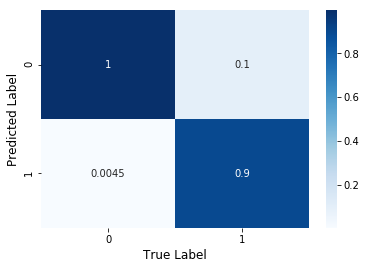

In [77]:
# Confusion Matrix
plot_confusion_matrix()

# TP 0.98 TN 0.86

In [78]:
predicted_val_logi = logi.predict_proba(test)[:, 1]
winner_lg = pd.concat([BB_tamil_participant, pd.DataFrame(predicted_val_logi, columns=['Predicted_Winner'])],axis=1)
winner_lg.sort_values('Predicted_Winner', ascending=False)

,Name,Predicted_Winner
0,Abhinay Vaddi,0.006046
5,Niroop Nandhakumar,0.006046
6,Shariq Hassan Khan,0.006046
9,Suresh Chakravarthi,0.006046
11,Thadi Bhalajie,0.006046
7,Snehan,0.003937
12,Thamarai Selvi,0.002481
2,Anitha Sampath,0.002193
4,Maria Juliana,0.002128
8,Suja Varunee,0.002128


## Predicted Winner for Bigg Boss Tamil Ultimate Season, as per Logistic Regression

In [79]:
# Predicted Winner for Bigg Boss Tamil Ultimate Season, as per LogisticRegression
winner_lg[winner_lg['Predicted_Winner'] == np.amax(winner_lg.Predicted_Winner)]

,Name,Predicted_Winner
0,Abhinay Vaddi,0.006046
5,Niroop Nandhakumar,0.006046
6,Shariq Hassan Khan,0.006046
9,Suresh Chakravarthi,0.006046
11,Thadi Bhalajie,0.006046


In [80]:
# Random Forest
rf = RandomForestClassifier(n_estimators=5000, random_state=2022).fit(x_train, y_train)
rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5000,
                       n_jobs=None, oob_score=False, random_state=2022,
                       verbose=0, warm_start=False)

In [81]:
predicted_val_rf = rf.predict_proba(x_val)[:, 1]
y_predicted_val = (predicted_val_rf > 0.3).astype("int").ravel()
print('F1 Score -', f1_score(y_val, y_predicted_val, average='weighted')*100)
print('Accuracy Score -', accuracy_score(y_val, y_predicted_val)*100)

# n_estimators=100 accuracy 99.4
# n_estimators=200 accuracy 100

F1 Score - 98.59713846195733
Accuracy Score - 98.70689655172413


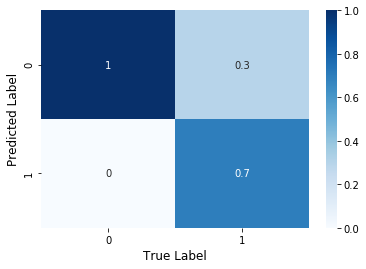

In [82]:
# Confusion Matrix
plot_confusion_matrix()

# TP 1 TN 0.88

In [83]:
predicted_val_rf = rf.predict_proba(test)[:,1]
winner_rf = pd.concat([BB_tamil_participant, pd.DataFrame(predicted_val_rf, columns=['Predicted_Winner'])],axis=1)
winner_rf.sort_values('Predicted_Winner', ascending=False)

,Name,Predicted_Winner
0,Abhinay Vaddi,0.0100
5,Niroop Nandhakumar,0.0100
6,Shariq Hassan Khan,0.0100
9,Suresh Chakravarthi,0.0100
11,Thadi Bhalajie,0.0100
7,Snehan,0.0030
3,Balaji Murugadoss,0.0028
2,Anitha Sampath,0.0010
4,Maria Juliana,0.0010
8,Suja Varunee,0.0010


## Predicted Winner for Bigg Boss Tamil Ultimate Season, as per Random Forest

In [84]:
# Predicted Winner for Bigg Boss Tamil Ultimate Season, as per RandomForest
winner_rf[winner_rf['Predicted_Winner'] == np.amax(winner_rf.Predicted_Winner)]

,Name,Predicted_Winner
0,Abhinay Vaddi,0.01
5,Niroop Nandhakumar,0.01
6,Shariq Hassan Khan,0.01
9,Suresh Chakravarthi,0.01
11,Thadi Bhalajie,0.01


## Machine Learning (ML) models to predict Indian BiggBoss (Big Brother) season Winners

## Hindi Bigg Boss Season15
## https://www.kaggle.com/thirumani/predicting-bigg-boss-hindi-season-15-winner

## Kannada Bigg Boss Season8
## https://www.kaggle.com/thirumani/predicting-bigg-boss-kannada-season-8-winner

## Telugu Bigg Boss Season5
## https://www.kaggle.com/thirumani/predicting-bigg-boss-telugu-season-5-winner

## Malayalam Bigg Boss Season3
## https://www.kaggle.com/thirumani/predicting-bigg-boss-malayalam-season-3-winner

## Marathi Bigg Boss Season3
## https://www.kaggle.com/thirumani/predicting-bigg-boss-marathi-season-3-winner

In [85]:
text = " BiggBoss ".join(cat for cat in bigg_boss['Language'])
wordcloud = WordCloud(width = 3000, height = 2000, background_color='salmon', colormap='Pastel2', collocations=False, random_state=2022).generate(text)
wordcloud.to_file("world_cloud_tamil.png")

<img src="./world_cloud_tamil.png">

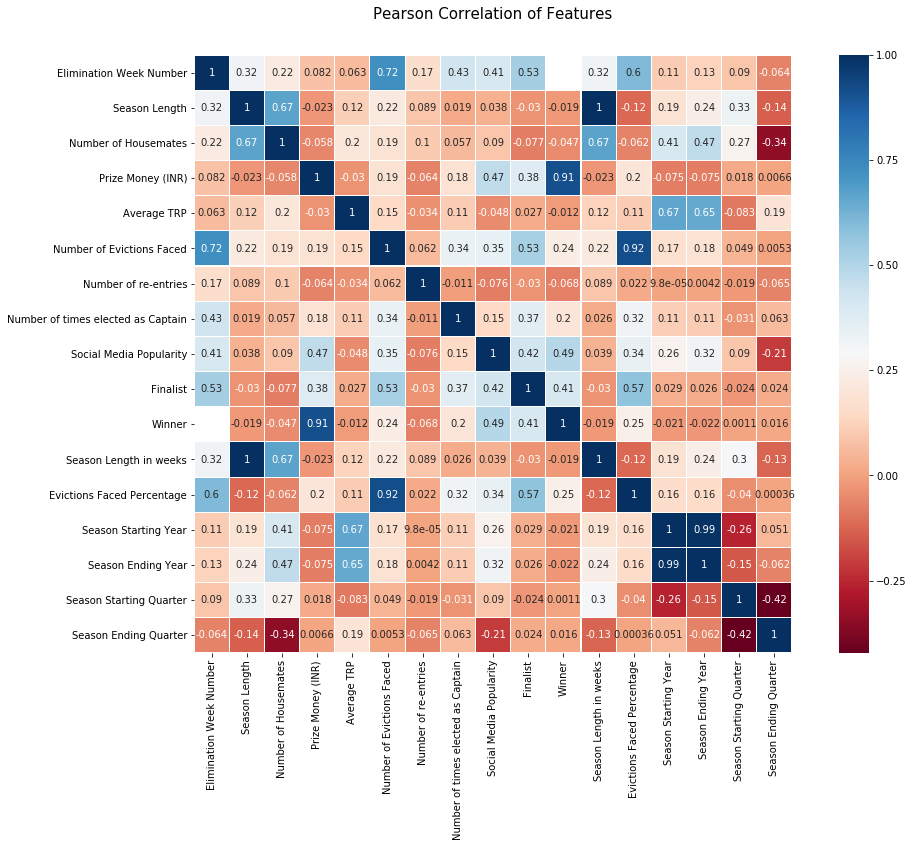

In [86]:
# Correlation matrix (Heatmap style)
corrmat = bigg_boss.corr()
f, ax = plt.subplots(figsize=(17, 11))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(corrmat, vmax=1.0, linewidths=0.1, square=True, cmap="RdBu", linecolor='white', annot=True);

In [87]:
# Crosschecking Actor/Actress Gender
bigg_boss[bigg_boss['Profession'].str.contains('Act')].groupby('Gender')['Profession'].value_counts().unstack()
#bigg_boss.loc[(bigg_boss['Profession']=='Actress') & (bigg_boss['Gender']=='Male')]

Profession,Activist,Actor,Actor & Actress,Actress,Soap Actor,Soap Actress,Stage Actress
Gender,,,,,,,
Couple,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Female,4.0,NaN,NaN,170.0,NaN,65.0,2.0
Male,4.0,130.0,NaN,NaN,38.0,NaN,NaN


In [88]:
print("numpy version: {}". format(np.__version__))
print("pandas version: {}". format(pd.__version__))

import matplotlib
print("matplotlib version: {}". format(matplotlib. __version__))
print("seaborn version: {}". format(sns.__version__))

import sklearn
print("sklearn version: {}". format(sklearn.__version__))

# numpy version: 1.16.4
# pandas version: 0.25.2
# matplotlib version: 3.0.3
# seaborn version: 0.9.0
# sklearn version: 0.21.3

numpy version: 1.16.4
pandas version: 0.25.2
matplotlib version: 3.0.3
seaborn version: 0.9.0
sklearn version: 0.21.3
